<a href="https://colab.research.google.com/github/CINTHIAAGUDELOH/Entrega2/blob/main/Evidencia_de_aprendizaje_1_An%C3%A1lisis_y_herramientas_de_extracci%C3%B3n_de_datos_(grafico).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evidencia de aprendizaje 1. Análisis y herramientas de extracción de datos

Daniel Lopera Gomez

Laura Arboleda Gallego

Cinthia Agudelo Herrera

Ingenieria de Software

Programacion para analisis de datos


**INTRODUCCION**


La metodología de scraping, o extracción de datos, se ha convertido en una herramienta fundamental en el ámbito de la recopilación y análisis de información en la era digital. A medida que la cantidad de datos disponibles en línea crece exponencialmente, el scraping permite a los investigadores, analistas de mercado y desarrolladores acceder a información valiosa de manera eficiente. Esta técnica implica la utilización de software o scripts para extraer datos de sitios web, permitiendo así la recolección de información de diversas fuentes en un formato estructurado. A través de esta metodología, es posible obtener datos que van desde precios de productos hasta comentarios de usuarios, abriendo un abanico de oportunidades para la toma de decisiones informadas y el desarrollo de estrategias basadas en datos.

**Descripción de la página y artículo a analizar.**

Mercado Libre es una plataforma de comercio electrónico líder en América Latina, que permite a los usuarios comprar y vender productos de diversas categorías, como tecnología, moda, hogar y más. Ofrece servicios de pago (Mercado Pago), envío (Mercado Envíos) y financiamiento (Mercado Crédito). Está presente en varios países de la región, incluyendo Argentina, Brasil, México y Colombia.

En este análisis, centraremos nuestra atención en la página de Mercado Libre Colombia.Esto nos permitirá realizar un análisis más profundo del mercado a nivel nacional.

El enfoque principal será en los Computadores Portatiles, los computadores son una herramientas esencial en nuestra vida cotidiana, tanto para el trabajo como para el estudio. A través de este análisis, buscaremos determinar el costo de adquirir estos dispositivos tan fundamentales y evaluar su accesibilidad en el mercado colombiano y como puede variar los precios segun las marcas y sus caracteristicas.

**OBJETIVOS**

**Determinar los precios promedio:** Identificar los costos de los computadores portatiles para establecer un rango de precios y compararlo con otros canales de venta.

**Evaluar la accesibilidad:**Examinar la disponibilidad en las diferentes tiendas segun caracteristicas y marca

**Realizar un análisis comparativo:** Comparar los precios de los computadores en Mercado Libre con los ofrecidos en otras plataformas y tiendas físicas, para evaluar la competitividad del mercado.

### **METODOLOGIA SCRAPING CON SELENIUM**

In [1]:
# Instalación de los paquetes

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 19.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,502 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:1

                                               Marcas     Precio  \
0   Computador Portátil Compumax Intel Celeron Dis...    995.247   
1   Portátil Computador Hp Intel Dual Core Ram 8gb...  1.433.320   
2   Computador Portatil Dell 3520 Core I3 1215u 24...  2.142.714   
3   Computador Portatil Asus X1504za-nj227 Core I5...  2.299.000   
4   Computador Portatil Asus X1504za Core I5 1235u...  1.899.900   
5   Portátil Computador Dell Intel Core I3 Ssd 512...  1.470.000   
6   Computador Portatil Lenovo Intel I3 1215u Ram ...  2.071.286   
7   Portatil Acer A315-59-50kp Ci5 1235u 15,6 8gb ...  1.899.900   
8   Computador Portatil Dell Core I5 11gen 16gb 1t...  2.003.105   
9   Notebook Dell Inspiron 3525 platinum silver 15...  2.450.000   
10  Portatil Asus X1605za-mb918 Core I7-12700h 16g...  3.196.471   
11  Potátil 255 G7 15.6" color gris 8GB de Ram - 1...  1.550.000   
12  Computador Portatil Gamer Msi Cyborg Negra 15....  6.499.999   
13  Computador Portatil Gamer Lenovo Loq 15arp9 

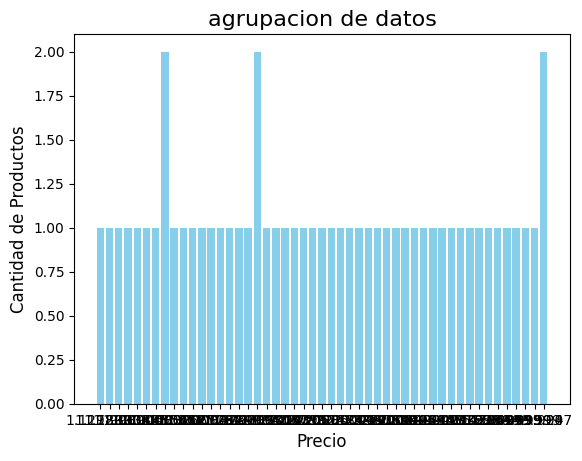

In [67]:
import sys
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



options= webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)


url = "https://listado.mercadolibre.com.co/computadores-portatiles#D[A:computadores%20portatiles]"

driver.get(url)

time.sleep(5)

# Extrae la información

# Listas para almacenar los datos extraídos
marcas= []
precios = []
caracteristicas = []

computadores = driver.find_elements (By.XPATH,'//li[@class="ui-search-layout__item shops__layout-item"]')


for computador in computadores:
    try:
        marca = computador.find_element(By.XPATH, './/h2[@class="poly-box poly-component__title"]').text
        precio = computador.find_element(By.CLASS_NAME, 'andes-money-amount__fraction').text
        caracteristicas_texto = computador.find_element(By.XPATH, './/h2[@class="poly-box poly-component__title"]/a').text

            # Agrega los datos a las listas
        marcas.append(marca)
        precios.append(precio)
        caracteristicas.append(caracteristicas_texto)
    except Exception as e:
        print(f'Error al extraer un producto: {e}')

# Crea un DataFrame con los datos extraídos
df = pd.DataFrame({
    'Marcas': marcas,
    'Precio': precios,
    'Caracteristicas': caracteristicas
    })

# Imprime el DataFrame
print(df)


df.to_excel("datos_extraidos.xlsx", index=False)


# Agrupar por 'Precio'
df_grouped = df.groupby('Precio').size().reset_index(name='Cantidad de Productos')

# Mostrar el resultado
print(df_grouped)

# Usamos seaborn para crear el gráfico de barras
plt.bar(df_grouped['Precio'], df_grouped['Cantidad de Productos'], color='skyblue')

# Personalizar el gráfico
plt.title('agrupacion de datos', fontsize=16)  # Título
plt.xlabel('Precio', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Cantidad de Productos', fontsize=12)  # Etiqueta del eje Y

# Mostrar el gráfico
plt.show()



driver.quit()
#files.download("datos_extraidos.xlsx")


**RESULTADOS**

**Precios Promedio:**

Se extrajo una muestra de precios de diversos computadores portátiles. Los precios varían ampliamente según la marca, características (como el tamaño de la pantalla, la memoria RAM, el procesador, etc.) y la tienda en la que se ofrece el producto.
Los precios promedio pueden ser calculados a partir de los datos extraídos, permitiendo identificar los rangos más comunes para dispositivos básicos, de gama media y alta.

**Marcas Más Populares:**
Las marcas más representadas en el análisis incluyen HP, Lenovo, Acer, Asus, Dell, entre otras. Esto refleja la variedad del mercado de computadoras portátiles en Colombia y sugiere qué marcas tienen una presencia significativa en la plataforma de Mercado Libre.

**Características Comunes:**
Las características que se repiten con mayor frecuencia incluyen:
Pantallas de 14" a 15.6".
Procesadores Intel Core i3, i5 y AMD Ryzen.
Memoria RAM de 4GB a 8GB.
Almacenamiento de 500GB a 1TB en discos duros HDD y SSD.
Esto indica que las configuraciones más demandadas son las de gama media, adecuadas tanto para estudiantes como para profesionales que requieren equipos para tareas de productividad diaria.

**Accesibilidad:**
Los productos están disponibles de forma amplia, lo que indica una buena accesibilidad en términos de cantidad. Sin embargo, los precios y disponibilidad pueden variar según la marca y las características específicas.

**CONCLUSIONES**

-Mercado Libre Colombia presenta una gran diversidad de precios, lo que lo convierte en un canal atractivo para consumidores que buscan comparar precios y características antes de tomar una decisión de compra

-Los computadores portátiles están ampliamente disponibles, y las características más demandadas son consistentes entre las diferentes marcas y modelos. Esto demuestra que los consumidores en Colombia tienen un acceso relativamente fácil a una amplia gama de productos tecnológicos a través de Mercado Libre.

-La variabilidad de características (como el procesador, tamaño de pantalla y capacidad de almacenamiento) sugiere que Mercado Libre tiene un amplio espectro de opciones tanto para usuarios que necesitan equipos básicos como para aquellos que buscan mayor rendimiento para tareas más exigentes.

-En resumen, Mercado Libre Colombia es una plataforma eficiente para la compra de computadores portátiles, con una gran variedad de opciones en cuanto a precio, características y marcas.

**BIBLIOGRAFIA**

-Hostinger. (s.f.). Python web scraping tutorial. Hostinger. https://www.hostinger.com/tutorials/python-web-scraping?utm_campaign=Generic-Tutorials-DSA|NT:Se|LO:CO-EN&utm_medium=ppc&gad_source=1&gclid=Cj0KCQiArby5BhCDARIsAIJvjISRqPG7mS24cKF9l1zv9Y1Fn-GiXv0YrTvq4b53_lEGaMRik29obL8aAkn_EALw_wcB
